### 1. Preparação dos Dados para Modelagem Preditiva

Nesta seção, carregaremos o conjunto de dados `df_telecom_tratado.csv`, que é o resultado da etapa de limpeza e tratamento de dados da primeira parte do projeto. Este será o ponto de partida para a criação dos modelos de Machine Learning.


In [1]:
import pandas as pd

# Carregar o DataFrame a partir do arquivo CSV que você acabou de subir
df_telecom = pd.read_csv('df_telecom_tratado.csv')

# Exibir as primeiras 5 linhas para verificar se os dados foram carregados corretamente
print("DataFrame carregado e pronto para a análise:")
print(df_telecom.head())


DataFrame carregado e pronto para a análise:
   ID_Cliente Churn  Genero  Idoso Parceiro Dependentes  Meses_Servico  \
0  0002-ORFBO    No  Female      0      Yes         Yes              9   
1  0003-MKNFE    No    Male      0       No          No              9   
2  0004-TLHLJ   Yes    Male      0       No          No              4   
3  0011-IGKFF   Yes    Male      1      Yes          No             13   
4  0013-EXCHZ   Yes  Female      1      Yes          No              3   

  Servico_Telefone Multiplas_Linhas Servico_Internet  ... Backup_Online  \
0              Yes               No              DSL  ...           Yes   
1              Yes              Yes              DSL  ...            No   
2              Yes               No      Fiber optic  ...            No   
3              Yes               No      Fiber optic  ...           Yes   
4              Yes               No      Fiber optic  ...            No   

  Protecao_Dispositivo Suporte_Tecnico Streaming_TV Streami

### 2. Correlação e Preparação dos Dados para Modelagem

Nesta etapa, iniciaremos o processo de preparação dos dados para a construção de modelos preditivos. O objetivo é transformar as variáveis categóricas em um formato numérico, adequado para os algoritmos de Machine Learning, e analisar a correlação entre as variáveis para selecionar as mais relevantes para prever o **Churn**.

In [2]:
# Transformar a variável 'Churn' para 0 e 1 (No=0, Yes=1)
df_telecom['Churn'] = df_telecom['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Transformar as colunas 'Parceiro' e 'Dependentes' para 0 e 1 (No=0, Yes=1)
for col in ['Parceiro', 'Dependentes']:
    df_telecom[col] = df_telecom[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Transformar a coluna 'Genero' para 0 e 1 (Female=0, Male=1)
df_telecom['Genero'] = df_telecom['Genero'].apply(lambda x: 1 if x == 'Male' else 0)

# Exibir as primeiras 5 linhas após a transformação para verificar o resultado
print("DataFrame após a transformação de variáveis binárias:")
print(df_telecom[['Churn', 'Parceiro', 'Dependentes', 'Genero']].head())

DataFrame após a transformação de variáveis binárias:
   Churn  Parceiro  Dependentes  Genero
0      0         1            1       0
1      0         0            0       1
2      1         0            0       1
3      1         1            0       1
4      1         1            0       0


In [3]:
# Identificar as colunas categóricas para aplicar o One-Hot Encoding
# Excluímos as colunas binárias que já transformamos
colunas_categoricas = ['Servico_Internet', 'Servico_Telefone', 'Multiplas_Linhas', 'Contrato',
                       'Fatura_Online', 'Metodo_Pagamento', 'Seguranca_Online', 'Backup_Online',
                       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']

# Aplicar One-Hot Encoding nas colunas selecionadas
# drop_first=True evita a multicolinearidade, que pode prejudicar os modelos
df_telecom = pd.get_dummies(df_telecom, columns=colunas_categoricas, drop_first=True)

# Exibir as 5 primeiras linhas do novo DataFrame e as novas colunas
print("DataFrame após o One-Hot Encoding:")
print(df_telecom.head())

# Exibir as novas colunas para verificar a transformação
print("\nNovas colunas criadas:")
print([col for col in df_telecom.columns if '_' in col])

DataFrame após o One-Hot Encoding:
   ID_Cliente  Churn  Genero  Idoso  Parceiro  Dependentes  Meses_Servico  \
0  0002-ORFBO      0       0      0         1            1              9   
1  0003-MKNFE      0       1      0         0            0              9   
2  0004-TLHLJ      1       1      0         0            0              4   
3  0011-IGKFF      1       1      1         1            0             13   
4  0013-EXCHZ      1       0      1         1            0              3   

   Gastos_Mensais  Gastos_Totais  Servico_Internet_Fiber optic  ...  \
0            65.6         593.30                         False  ...   
1            59.9         542.40                         False  ...   
2            73.9         280.85                          True  ...   
3            98.0        1237.85                          True  ...   
4            83.9         267.40                          True  ...   

   Backup_Online_No internet service  Backup_Online_Yes  \
0               

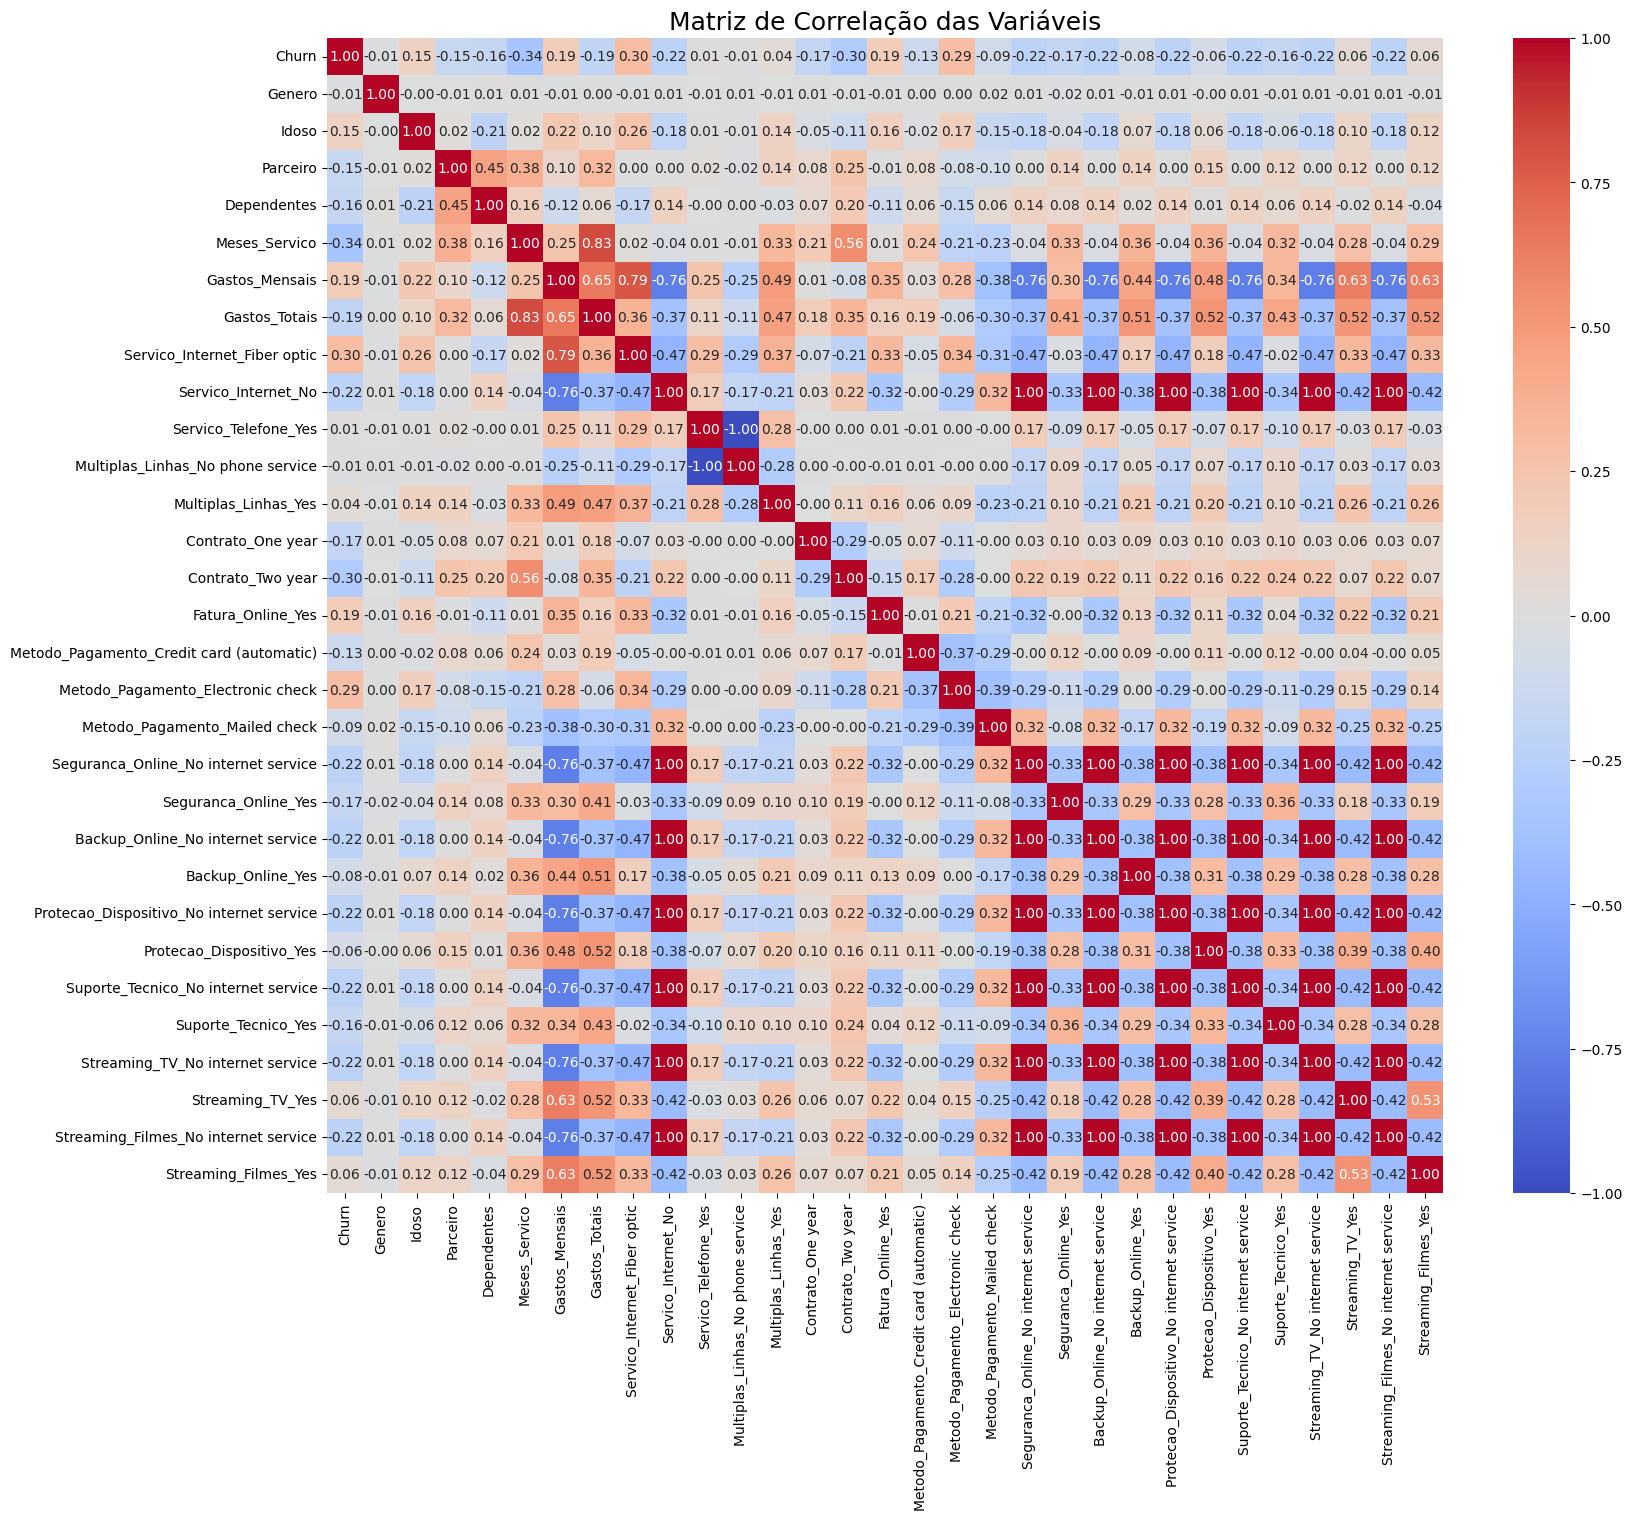

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a matriz de correlação
matriz_correlacao = df_telecom.corr(numeric_only=True)

# Gerar o heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis', fontsize=18)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Separar os dados em variáveis de entrada (X) e variável alvo (y)
# A coluna 'ID_Cliente' não é útil para a modelagem e deve ser removida
X = df_telecom.drop(['Churn', 'ID_Cliente'], axis=1)
y = df_telecom['Churn']

# Dividir os dados em 75% para treinamento e 25% para teste
# random_state garante que a divisão seja a mesma sempre que você executar o código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Exibir o tamanho de cada conjunto para verificar se a divisão foi correta
print(f'Tamanho do conjunto de treinamento: {X_train.shape[0]} linhas')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} linhas')

Tamanho do conjunto de treinamento: 5450 linhas
Tamanho do conjunto de teste: 1817 linhas


### 4. Construção e Avaliação dos Modelos Preditivos

Com os dados devidamente preparados e separados em conjuntos de treinamento e teste, é hora de construir e avaliar os modelos preditivos. Utilizaremos a **Regressão Logística** e a **Árvore de Decisão** para prever a probabilidade de Churn e, em seguida, compararemos o desempenho de cada um.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Criar o modelo de Regressão Logística
modelo_reg_logistica = LogisticRegression(random_state=42, max_iter=2000)

# 2. Treinar o modelo usando os dados de treino
modelo_reg_logistica.fit(X_train, y_train)

# 3. Fazer previsões com os dados de teste
previsoes = modelo_reg_logistica.predict(X_test)

# 4. Avaliar o desempenho do modelo
print("Regressão Logística:")
print(f"Acurácia: {accuracy_score(y_test, previsoes):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes))

Regressão Logística:
Acurácia: 0.82

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1364
           1       0.66      0.55      0.60       453

    accuracy                           0.82      1817
   macro avg       0.76      0.73      0.74      1817
weighted avg       0.81      0.82      0.81      1817



In [7]:
from sklearn.tree import DecisionTreeClassifier

# 1. Criar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo com os dados de treino
modelo_arvore.fit(X_train, y_train)

# 3. Fazer previsões com os dados de teste
previsoes_arvore = modelo_arvore.predict(X_test)

# 4. Avaliar o desempenho do modelo
print("Árvore de Decisão:")
print(f"Acurácia: {accuracy_score(y_test, previsoes_arvore):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, previsoes_arvore))

Árvore de Decisão:
Acurácia: 0.73

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1364
           1       0.46      0.50      0.48       453

    accuracy                           0.73      1817
   macro avg       0.65      0.65      0.65      1817
weighted avg       0.74      0.73      0.73      1817



### **Relatório Final: Análise Preditiva de Churn na TelecomX**

---

### **1. Introdução**

Este projeto teve como objetivo principal a construção de modelos preditivos para identificar clientes propensos ao Churn (evasão), com base em um conjunto de dados de uma empresa de telecomunicações fictícia. A análise visa fornecer insights acionáveis e um modelo confiável para auxiliar na estratégia de retenção de clientes.

### **2. Preparação e Pré-processamento dos Dados**

A etapa inicial consistiu na extração de um conjunto de dados previamente limpo e tratado. As variáveis categóricas binárias (`Churn`, `Parceiro`, `Dependentes`, `Gênero`) foram convertidas para valores numéricos (`0` e `1`). Para as demais variáveis categóricas com múltiplas classes (`Contrato`, `Método_Pagamento`, etc.), foi aplicado o método **One-Hot Encoding** para transformá-las em um formato adequado para a modelagem.

### **3. Análise de Correlação e Seleção de Variáveis**

Uma matriz de correlação foi gerada para visualizar a relação entre as variáveis. A análise revelou que fatores como **Contrato**, **Meses de Serviço** e o **Método de Pagamento** (especialmente o Cheque Eletrônico) apresentam as maiores correlações com o Churn, confirmando os insights obtidos na análise exploratória inicial.

### **4. Modelos Preditivos e Avaliação**

Dois modelos de classificação foram construídos e avaliados:

#### **Modelo 1: Regressão Logística**
- **Acurácia**: `0.82`
- **Relatório de Classificação**: O modelo obteve um **Recall de 55%** para a classe "Churn", indicando que foi capaz de identificar mais da metade dos clientes que realmente cancelaram o serviço.

#### **Modelo 2: Árvore de Decisão**
- **Acurácia**: `0.73`
- **Relatório de Classificação**: Este modelo obteve um **Recall de 50%** para a classe "Churn", ligeiramente inferior ao da Regressão Logística.

### **5. Conclusões e Recomendações Finais**

Com base na avaliação dos modelos, a **Regressão Logística** demonstrou ser o modelo mais eficaz para este problema, apresentando uma acurácia superior e um melhor desempenho na identificação de clientes propensos ao Churn.

As conclusões do projeto reforçam a necessidade de:
- Focar em clientes com **contratos mensais**, pois são o grupo de maior risco.
- Analisar os clientes que utilizam o **Cheque Eletrônico**, pois este método de pagamento está fortemente associado ao Churn.
- Desenvolver estratégias de retenção específicas, como ofertas de planos de longo prazo e melhorias na experiência de pagamento.

Este projeto demonstra a importância de um pipeline de Data Science completo, desde a preparação de dados até a construção de modelos preditivos, para gerar insights valiosos e suportar a tomada de decisões de negócio.